In [1]:
# Importing Necessay Python libraries
import pickle


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import plotly.express as px
import plotly.io as pio
pio.templates.default = "plotly_white"
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# reading the data
data = pd.read_csv('Netflix-Subscriptions.csv')
print(data.head())

  Time Period  Subscribers
0  01/04/2013     34240000
1  01/07/2013     35640000
2  01/10/2013     38010000
3  01/01/2014     41430000
4  01/04/2014     46130000


In [2]:
data['Time Period'] = pd.to_datetime(data['Time Period'], 
                                     format='%d/%m/%Y')
print(data.head())

  Time Period  Subscribers
0  2013-04-01     34240000
1  2013-07-01     35640000
2  2013-10-01     38010000
3  2014-01-01     41430000
4  2014-04-01     46130000


In [3]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=data['Time Period'],
                         y=data['Subscribers'],
                         mode='lines', name='Subscribers'))
fig.update_layout(title='Netflix Quarterly Subscriptions Growth',
                  xaxis_title='Date',
                  yaxis_title='Netflix Subscriptions')
fig.show()

In [4]:
data['Quarterly Growth Rate'] = data['Subscribers'].pct_change() * 100

In [5]:
data.head()

Time Period  Subscribers  Quarterly Growth Rate
0  2013-04-01     34240000                    NaN
1  2013-07-01     35640000               4.088785
2  2013-10-01     38010000               6.649832
3  2014-01-01     41430000               8.997632
4  2014-04-01     46130000              11.344436

In [6]:
data["Bar Color"] = data["Quarterly Growth Rate"].apply(lambda x: 'green ' if x>0 else 'red')

In [7]:
data

Time Period  Subscribers  Quarterly Growth Rate Bar Color
0   2013-04-01     34240000                    NaN       red
1   2013-07-01     35640000               4.088785    green 
2   2013-10-01     38010000               6.649832    green 
3   2014-01-01     41430000               8.997632    green 
4   2014-04-01     46130000              11.344436    green 
5   2014-07-01     47990000               4.032083    green 
6   2014-10-01     50650000               5.542821    green 
7   2015-01-01     54480000               7.561698    green 
8   2015-04-01     59620000               9.434655    green 
9   2015-07-01     62080000               4.126132    green 
10  2015-10-01     66020000               6.346649    green 
11  2016-01-01     70840000               7.300818    green 
12  2016-04-01     77710000               9.697911    green 
13  2016-07-01     79900000               2.818170    green 
14  2016-10-01     83280000               4.230288    green 
15  2017-01-01     89090000               6.976465    green 
16  2017-04-01     94360000               5.915366    green 
17  2017-07-01     99040000               4.959729    green 
18  2017-10-01    104020000               5.028271    green 
19  2018-01-01    110640000               6.364161    green 
20  2018-04-01    118900000               7.465654    green 
21  2018-07-01    124350000               4.583684    green 
22  2018-10-01    130420000               4.881383    green 
23  2019-01-01    139260000               6.778102    green 
24  2019-04-01    148860000               6.893580    green 
25  2019-07-01    151560000               1.813785    green 
26  2019-10-01    158330000               4.466878    green 
27  2020-01-01    167090000               5.532748    green 
28  2020-04-01    182860000               9.438027    green 
29  2020-07-01    192950000               5.517883    green 
30  2020-10-01    195150000               1.140192    green 
31  2021-01-01    203660000               4.360748    green 
32  2021-04-01    207640000               1.954237    green 
33  2021-07-01    209180000               0.741668    green 
34  2021-10-01    213560000               2.093890    green 
35  2022-01-01    221840000               3.877131    green 
36  2022-04-01    221640000              -0.090155       red
37  2022-07-01    220670000              -0.437647       red
38  2022-10-01    223090000               1.096660    green 
39  2023-01-01    230750000               3.433592    green 
40  2023-04-01    232500000               0.758397    green 
41  2023-07-01    238390000               2.533333    green

In [8]:
fig = go.Figure()
fig.add_trace(go.Bar(
    x=data['Time Period'],
    y=data['Quarterly Growth Rate'],
    marker_color=data['Bar Color'],
    name='Quarterly Growth Rate'
))
fig.update_layout(title='Netflix Quarterly Subscriptions Growth Rate',
                  xaxis_title='Time Period',
                  yaxis_title='Quarterly Growth Rate (%)')
fig.show()

In [9]:
data["Year"] = data["Time Period"].dt.year

In [10]:
yearly_growth = round(data.groupby('Year')['Subscribers'].pct_change().fillna(0) * 100)

In [11]:
yearly_growth

0      0.0
1      4.0
2      7.0
3      0.0
4     11.0
5      4.0
6      6.0
7      0.0
8      9.0
9      4.0
10     6.0
11     0.0
12    10.0
13     3.0
14     4.0
15     0.0
16     6.0
17     5.0
18     5.0
19     0.0
20     7.0
21     5.0
22     5.0
23     0.0
24     7.0
25     2.0
26     4.0
27     0.0
28     9.0
29     6.0
30     1.0
31     0.0
32     2.0
33     1.0
34     2.0
35     0.0
36    -0.0
37    -0.0
38     1.0
39     0.0
40     1.0
41     3.0
Name: Subscribers, dtype: float64

In [12]:
data

Time Period  Subscribers  Quarterly Growth Rate Bar Color  Year
0   2013-04-01     34240000                    NaN       red  2013
1   2013-07-01     35640000               4.088785    green   2013
2   2013-10-01     38010000               6.649832    green   2013
3   2014-01-01     41430000               8.997632    green   2014
4   2014-04-01     46130000              11.344436    green   2014
5   2014-07-01     47990000               4.032083    green   2014
6   2014-10-01     50650000               5.542821    green   2014
7   2015-01-01     54480000               7.561698    green   2015
8   2015-04-01     59620000               9.434655    green   2015
9   2015-07-01     62080000               4.126132    green   2015
10  2015-10-01     66020000               6.346649    green   2015
11  2016-01-01     70840000               7.300818    green   2016
12  2016-04-01     77710000               9.697911    green   2016
13  2016-07-01     79900000               2.818170    green   2016
14  2016-10-01     83280000               4.230288    green   2016
15  2017-01-01     89090000               6.976465    green   2017
16  2017-04-01     94360000               5.915366    green   2017
17  2017-07-01     99040000               4.959729    green   2017
18  2017-10-01    104020000               5.028271    green   2017
19  2018-01-01    110640000               6.364161    green   2018
20  2018-04-01    118900000               7.465654    green   2018
21  2018-07-01    124350000               4.583684    green   2018
22  2018-10-01    130420000               4.881383    green   2018
23  2019-01-01    139260000               6.778102    green   2019
24  2019-04-01    148860000               6.893580    green   2019
25  2019-07-01    151560000               1.813785    green   2019
26  2019-10-01    158330000               4.466878    green   2019
27  2020-01-01    167090000               5.532748    green   2020
28  2020-04-01    182860000               9.438027    green   2020
29  2020-07-01    192950000               5.517883    green   2020
30  2020-10-01    195150000               1.140192    green   2020
31  2021-01-01    203660000               4.360748    green   2021
32  2021-04-01    207640000               1.954237    green   2021
33  2021-07-01    209180000               0.741668    green   2021
34  2021-10-01    213560000               2.093890    green   2021
35  2022-01-01    221840000               3.877131    green   2022
36  2022-04-01    221640000              -0.090155       red  2022
37  2022-07-01    220670000              -0.437647       red  2022
38  2022-10-01    223090000               1.096660    green   2022
39  2023-01-01    230750000               3.433592    green   2023
40  2023-04-01    232500000               0.758397    green   2023
41  2023-07-01    238390000               2.533333    green   2023

In [13]:

# Create a new column for bar color (green for positive growth, red for negative growth)
data['Bar Color'] = yearly_growth.apply(lambda x: 'green' if x > 0 else 'red')

# Plot the yearly subscriber growth rate using bar graphs
fig = go.Figure()
fig.add_trace(go.Bar(
    x=data['Year'],
    y=yearly_growth,
    marker_color=data['Bar Color'],
    name='Yearly Growth Rate'
))
fig.update_layout(title='Netflix Yearly Subscriber Growth Rate',
                  xaxis_title='Year',
                  yaxis_title='Yearly Growth Rate (%)')
fig.show()

In [14]:
time_series = data.set_index('Time Period')['Subscribers']

In [15]:
time_series

Time Period
2013-04-01     34240000
2013-07-01     35640000
2013-10-01     38010000
2014-01-01     41430000
2014-04-01     46130000
2014-07-01     47990000
2014-10-01     50650000
2015-01-01     54480000
2015-04-01     59620000
2015-07-01     62080000
2015-10-01     66020000
2016-01-01     70840000
2016-04-01     77710000
2016-07-01     79900000
2016-10-01     83280000
2017-01-01     89090000
2017-04-01     94360000
2017-07-01     99040000
2017-10-01    104020000
2018-01-01    110640000
2018-04-01    118900000
2018-07-01    124350000
2018-10-01    130420000
2019-01-01    139260000
2019-04-01    148860000
2019-07-01    151560000
2019-10-01    158330000
2020-01-01    167090000
2020-04-01    182860000
2020-07-01    192950000
2020-10-01    195150000
2021-01-01    203660000
2021-04-01    207640000
2021-07-01    209180000
2021-10-01    213560000
2022-01-01    221840000
2022-04-01    221640000
2022-07-01    220670000
2022-10-01    223090000
2023-01-01    230750000
2023-04-01    232500000
2023

C:\Users\Cihat Emre Karataş\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning:

The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.



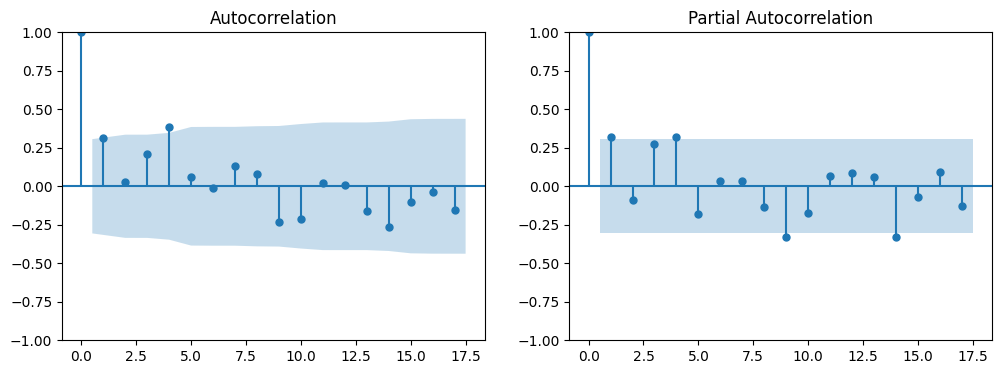

In [16]:
differenced_series = time_series.diff().dropna()

# Plot ACF and PACF of differenced time series
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
plot_acf(differenced_series, ax=axes[0])
plot_pacf(differenced_series, ax=axes[1])
plt.show()

ACF ve PACF grafiği, zaman serisi verisinin kendi kendine benzerliği veya otokorelasyon yapılarını analiz etmek için kullanılır. ACF grafiği, her gecikme (lag) değeri için otokorelasyonu gösterirken, PACF grafiği yalnızca belirli bir gecikme değeri için otokorelasyonu gösterir. Bu görselleştirmeler, zaman serisi verisiyle çalışırken model seçimi ve analizinde faydalı olabilir.

In [17]:
differenced_series

Time Period
2013-07-01     1400000.0
2013-10-01     2370000.0
2014-01-01     3420000.0
2014-04-01     4700000.0
2014-07-01     1860000.0
2014-10-01     2660000.0
2015-01-01     3830000.0
2015-04-01     5140000.0
2015-07-01     2460000.0
2015-10-01     3940000.0
2016-01-01     4820000.0
2016-04-01     6870000.0
2016-07-01     2190000.0
2016-10-01     3380000.0
2017-01-01     5810000.0
2017-04-01     5270000.0
2017-07-01     4680000.0
2017-10-01     4980000.0
2018-01-01     6620000.0
2018-04-01     8260000.0
2018-07-01     5450000.0
2018-10-01     6070000.0
2019-01-01     8840000.0
2019-04-01     9600000.0
2019-07-01     2700000.0
2019-10-01     6770000.0
2020-01-01     8760000.0
2020-04-01    15770000.0
2020-07-01    10090000.0
2020-10-01     2200000.0
2021-01-01     8510000.0
2021-04-01     3980000.0
2021-07-01     1540000.0
2021-10-01     4380000.0
2022-01-01     8280000.0
2022-04-01     -200000.0
2022-07-01     -970000.0
2022-10-01     2420000.0
2023-01-01     7660000.0
2023-04-01   

In [18]:
p, d, q = 1, 1, 2
model = ARIMA(time_series, order=(p, d, q))
results = model.fit()
print(results.summary())

C:\Users\Cihat Emre Karataş\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency QS-OCT will be used.

C:\Users\Cihat Emre Karataş\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency QS-OCT will be used.

C:\Users\Cihat Emre Karataş\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency QS-OCT will be used.



                               SARIMAX Results                                
Dep. Variable:            Subscribers   No. Observations:                   42
Model:                 ARIMA(1, 1, 2)   Log Likelihood                -672.893
Date:                Thu, 30 Nov 2023   AIC                           1353.786
Time:                        19:28:58   BIC                           1360.641
Sample:                    04-01-2013   HQIC                          1356.282
                         - 07-01-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9998      0.010     96.903      0.000       0.980       1.020
ma.L1         -0.9625      0.218     -4.407      0.000      -1.391      -0.534
ma.L2         -0.0300      0.113     -0.266      0.7

In [19]:
future_steps = 20
predictions = results.predict(len(time_series), len(time_series) + future_steps - 2)
predictions = predictions.astype(int)
predictions

2023-10-01    243339993
2024-01-01    248256768
2024-04-01    253172699
2024-07-01    258087787
2024-10-01    263002031
2025-01-01    267915431
2025-04-01    272827989
2025-07-01    277739704
2025-10-01    282650576
2026-01-01    287560605
2026-04-01    292469792
2026-07-01    297378136
2026-10-01    302285638
2027-01-01    307192298
2027-04-01    312098116
2027-07-01    317003092
2027-10-01    321907227
2028-01-01    326810520
2028-04-01    331712971
Freq: QS-OCT, Name: predicted_mean, dtype: int32

In [20]:
# Create a DataFrame with the original data and predictions
forecast = pd.DataFrame({'Original': time_series, 'Predictions': predictions})

# Plot the original data and predictions
fig = go.Figure()

fig.add_trace(go.Scatter(x=forecast.index, y=forecast['Predictions'],
                         mode='lines', name='Predictions'))

fig.add_trace(go.Scatter(x=forecast.index, y=forecast['Original'],
                         mode='lines', name='Original Data'))

fig.update_layout(title='Netflix Quarterly Subscription Predictions',
                  xaxis_title='Time Period',
                  yaxis_title='Subscribers',
                  legend=dict(x=0.1, y=0.9),
                  showlegend=True)

fig.show()

In [21]:
forecast

Original  Predictions
2013-04-01  34240000.0          NaN
2013-07-01  35640000.0          NaN
2013-10-01  38010000.0          NaN
2014-01-01  41430000.0          NaN
2014-04-01  46130000.0          NaN
...                ...          ...
2027-04-01         NaN  312098116.0
2027-07-01         NaN  317003092.0
2027-10-01         NaN  321907227.0
2028-01-01         NaN  326810520.0
2028-04-01         NaN  331712971.0

[61 rows x 2 columns]

In [22]:
with open('arima_model.pkl', 'wb') as model_file:
    pickle.dump(results, model_file)